In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://bit.ly/2ODZvLCHRDataset")

In [3]:
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [57]:
from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split


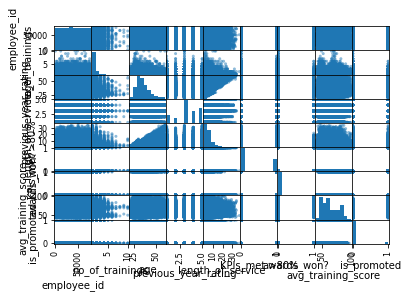

In [6]:
scatter_matrix(df)
pyplot.show()

In [93]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
df['department']= label_encoder.fit_transform(df['department'])
df['region']= label_encoder.fit_transform(df['region'])
df['gender']= label_encoder.fit_transform(df['gender'])
df['education']= label_encoder.fit_transform(df['education'])
df['recruitment_channel']= label_encoder.fit_transform(df['recruitment_channel'])

df.fillna(value=0, inplace=True)


In [94]:
array = df.values
X = array[:,1:13]
y = array[:,13]

In [95]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [98]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [99]:
model = DecisionTreeClassifier(criterion='entropy')

In [100]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [101]:
predictions = model.predict(X_validation)

In [102]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8981025360335705
[[9436  583]
 [ 534  409]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     10019
         1.0       0.41      0.43      0.42       943

    accuracy                           0.90     10962
   macro avg       0.68      0.69      0.68     10962
weighted avg       0.90      0.90      0.90     10962

